Pytorch를 사용한 선형 SVM 모델 학습 및 결정 경계 시각화 실습

In [64]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader, TensorDataset

데이터 생성

In [65]:
x = torch.randn(250,2)
y = torch.where(x[:,0] > x[:,1], 1, -1).float()

dataset = TensorDataset(x,y)
loader = DataLoader(dataset, batch_size=36)

SVM 모델 정의

In [66]:
class SVM(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2,1)
        
    def forward(self, x):
        return self.linear(x)

모델 손실 함수 옵티마이저 생성

In [67]:
model = SVM()
criterion = nn.HingeEmbeddingLoss()
# 양성 1, 음성 -1 클래스로 지정되어 있어야 사용가능(주어진 입력과 대사 사이의 경계선 손실값 계산하는 함수)
optimizer = optim.SGD(model.parameters(), lr=0.01)

모델 학습

In [68]:
for epoch in range(100):
    for inputs, targets in loader :
        output = model(inputs)
        loss = criterion(output.squeeze(), targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (epoch+1) % 10 == 0 :
        print(f'Epoch [{epoch+1}/50], Loss : {loss.item():.4f}')

Epoch [10/50], Loss : 0.2395
Epoch [20/50], Loss : -0.0377
Epoch [30/50], Loss : -0.2791
Epoch [40/50], Loss : -0.5118
Epoch [50/50], Loss : -0.7431
Epoch [60/50], Loss : -0.9718
Epoch [70/50], Loss : -1.1999
Epoch [80/50], Loss : -1.4280
Epoch [90/50], Loss : -1.6562
Epoch [100/50], Loss : -1.8845


시각화

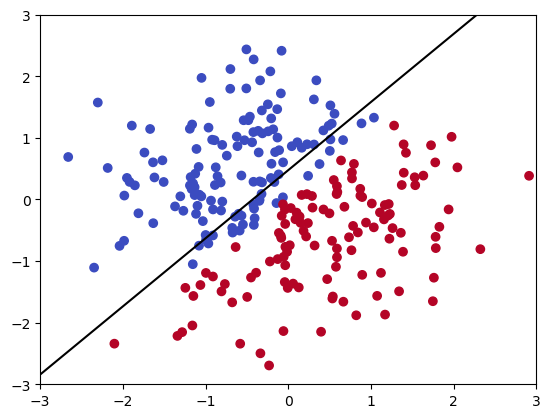

In [69]:
# 결정 경계 시각화
import matplotlib.pyplot as plt
import numpy as np

w = list (model.parameters())[0][0]
b = list (model.parameters())[1].item()
slope = (-w[0] / w[1]).detach().numpy()
intercept = (-b / w[1]).detach() .numpy()
x_range = np.linspace (-3, 3, 100)
y_range = slope * x_range + intercept

plt.scatter (x[:,0], x[:,1], c=y, cmap=plt.cm.coolwarm)
plt.plot (x_range, y_range, 'k-')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show ()